In [32]:
import  tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [33]:
# Load the MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

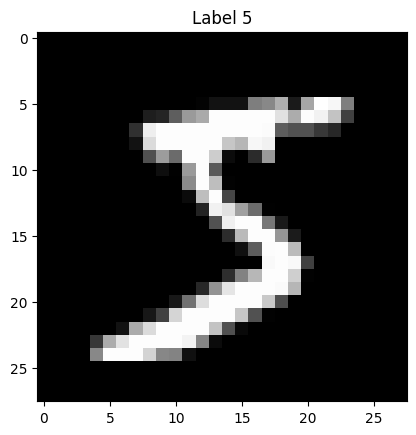

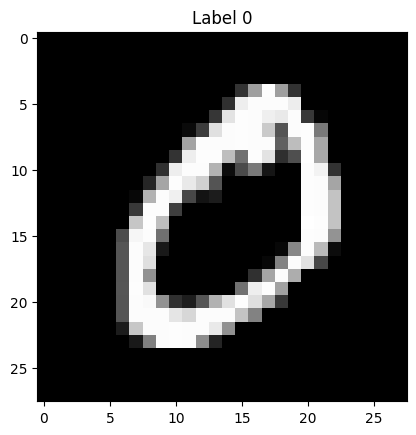

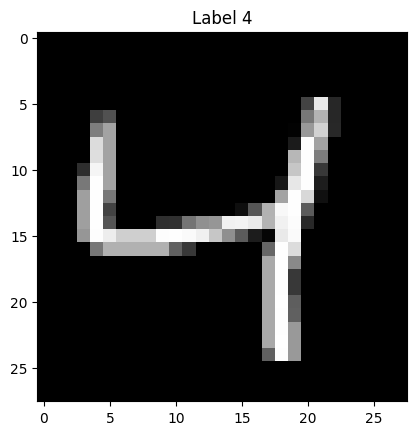

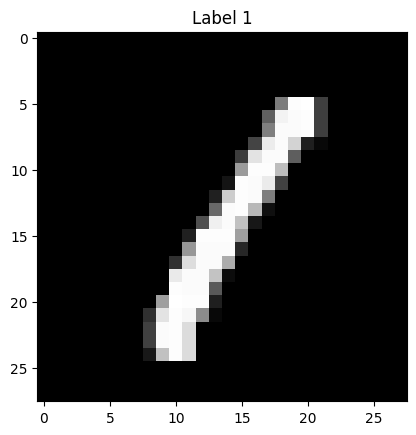

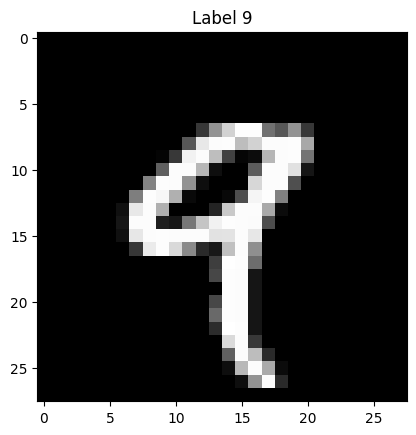

In [34]:
# Display the first 5 images and lable from training set
for i in range(5):
  plt.imshow(x_train[i],cmap='gray')
  plt.title("Label "+ str(y_train[i]))
  plt.show()


In [35]:
# Normalize the images (from [0, 255] to [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [36]:
#Reshape the images to add the channel dimension
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [37]:
# Check the shapes of the data
print(f'Training data shape: {x_train.shape}, Labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Labels shape: {y_test.shape}')

Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Labels shape: (10000,)


In [38]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [39]:
# Build the CNN model
model = models.Sequential()

In [40]:
# First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [41]:
# Second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [42]:
# MaxPooling layer to downsample by 2x2
model.add(layers.MaxPooling2D((2, 2)))

In [43]:
# Dropout layer for regularization
model.add(layers.Dropout(0.25))

In [44]:
# Flatten the feature maps into a 1D feature vector
model.add(layers.Flatten())

In [45]:
# Fully connected Dense layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

In [46]:
# Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

In [47]:
# Output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Display a summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 146s 155ms/step - accuracy: 0.9610 - loss: 0.1313 - val_accuracy: 0.9851 - val_loss: 0.0454
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 205s 159ms/step - accuracy: 0.9791 - loss: 0.0710 - val_accuracy: 0.9876 - val_loss: 0.0371
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 198s 155ms/step - accuracy: 0.9824 - loss: 0.0561 - val_accuracy: 0.9889 - val_loss: 0.0334
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 236s 191ms/step - accuracy: 0.9861 - loss: 0.0448 - val_accuracy: 0.9900 - val_loss: 0.0312
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 195s 184ms/step - accuracy: 0.9863 - loss: 0.0416 - val_accuracy: 0.9909 - val_loss: 0.0286


In [52]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9885 - loss: 0.0352
Test accuracy: 0.9909


In [53]:
history.history['accuracy']

[0.9671333432197571,
 0.9789999723434448,
 0.9829166531562805,
 0.985450029373169,
 0.9872000217437744]

In [54]:
history.history['val_accuracy']

[0.9850999712944031,
 0.9876000285148621,
 0.9889000058174133,
 0.9900000095367432,
 0.9908999800682068]

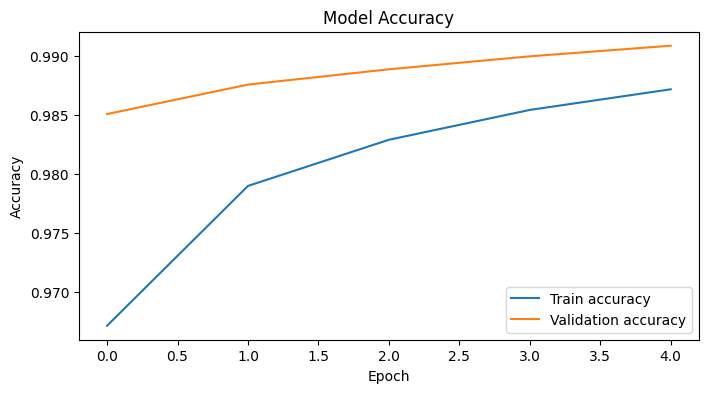

In [56]:
#Plot traning & validation  accuracy values
plt.figure(figsize=(8,4))

plt.plot(history.history['accuracy'], label="Train accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

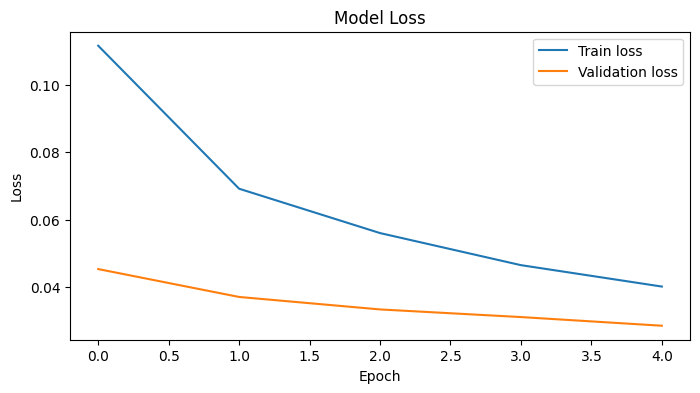

In [57]:
#Plot traning & validation  accuracy values
plt.figure(figsize=(8,4))

plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
